In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [14]:
# df_clss = pd.read_csv('data_banknote_authentication.csv')
df = pd.read_csv('banknote_data.csv')

In [15]:
df.isnull().sum()

V1    0
V2    0
dtype: int64

In [16]:
df.describe()

,V1,V2
count,1372.000000,1372.000000
mean,0.433735,1.922353
std,2.842763,5.869047
min,-7.042100,-13.773100
25%,-1.773000,-1.708200
50%,0.496180,2.319650
75%,2.821475,6.814625
max,6.824800,12.951600


In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1372 non-null   float64
 1   V2      1372 non-null   float64
dtypes: float64(2)
memory usage: 21.6 KB


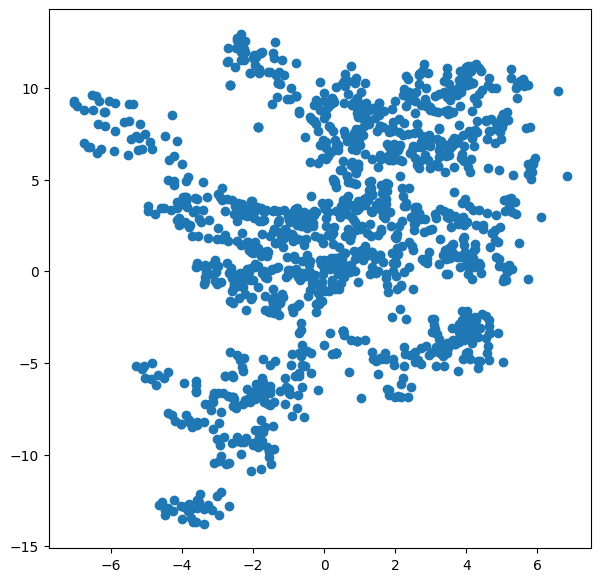

In [18]:
plt.figure(figsize = [7, 7])
plt.scatter(df.V1, df.V2)

c:\Users\chiss\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\chiss\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\chiss\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\chiss\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\chis

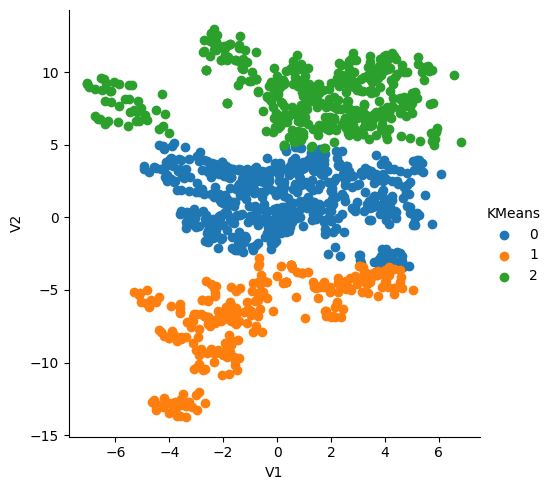

In [19]:
data = np.column_stack((df.V1, df.V2))  # we use only V1 and V2

# compute K-Means
km_res = KMeans(n_clusters = 3).fit(data)
clusters = km_res.cluster_centers_

# put the assigned labels to the original dataset
df['KMeans'] = km_res.labels_

#plot out the result
g = sns.FacetGrid(data = df, hue = 'KMeans', size = 5)
g.map(plt.scatter, 'V1', 'V2')
g.add_legend()

In [20]:
X = df.iloc[:,0:1]
y = df.iloc[:,1:2]

In [21]:
from sklearn.cluster import KMeans
k_meansclus = range(1,10)
sse = []

for k in k_meansclus:
  km = KMeans(n_clusters =k)
  km.fit(X)
  sse.append(km.inertia_)

c:\Users\chiss\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\chiss\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\chiss\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\chiss\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

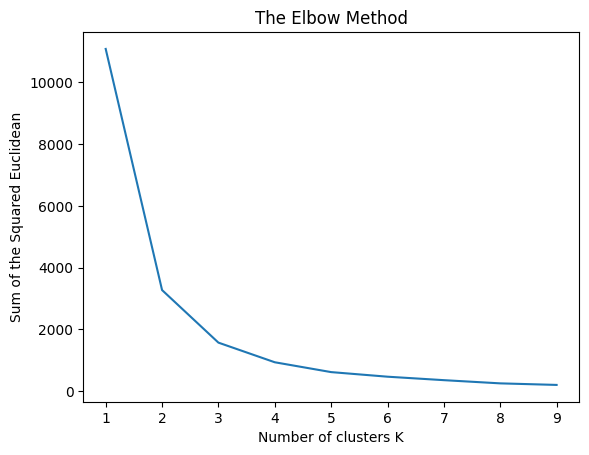

In [22]:
plt.title('The Elbow Method')
plt.plot(k_meansclus,sse)
plt.xlabel('Number of clusters K')
plt.ylabel('Sum of the Squared Euclidean')
plt.show()

In [23]:
km1 = KMeans(n_clusters=3)
km1.fit(X)
y_cluster = km1.predict(X)
y_cluster

c:\Users\chiss\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, ..., 2, 2, 2])

**Model Evaluation**

In [27]:
data = np.column_stack((df.V1, df.V2))
data

array([[  3.6216 ,   8.6661 ],
       [  4.5459 ,   8.1674 ],
       [  3.866  ,  -2.6383 ],
       ...,
       [ -3.7503 , -13.4586 ],
       [ -3.5637 ,  -8.3827 ],
       [ -2.5419 ,  -0.65804]])

c:\Users\chiss\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\chiss\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


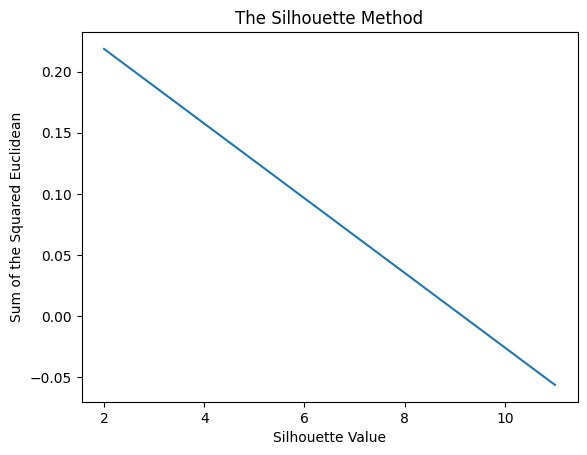

c:\Users\chiss\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [30]:
from sklearn.metrics import silhouette_score

sil = []
krange = (2, 11)

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in krange:
  kmeans = KMeans(n_clusters = k).fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(data, labels, metric = 'euclidean'))

plt.title('The Silhouette Method')
plt.plot(krange,sil)
plt.xlabel('Silhouette Value')
plt.ylabel('Sum of the Squared Euclidean')
plt.show()

model = KMeans(n_clusters=3)
model.fit(data)

In [31]:
silhouette_score(data, model.labels_)

0.43362017621560883

In [32]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(data, model.labels_)

0.8181686203187953